In [ ]:
# !pip install pyspark

In [ ]:
# from pyspark.sql import SparkSession

In [ ]:
# spark = SparkSession.builder.appName("Parquet reader").getOrCreate()

In [ ]:
# df = spark.read.parquet("dados_sensores_5000.parquet")

# df.show(5)

+---------+-----------+-------+------------+---------+
|  empresa|energia_kwh|agua_m3|co2_emissoes|    setor|
+---------+-----------+-------+------------+---------+
|Empresa_1|     6397.1| 296.58|     1600.24| Educação|
|Empresa_2|     2570.3| 492.52|      818.98|    Saúde|
|Empresa_3|     4166.2| 158.67|     2710.03|    Saúde|
|Empresa_4|    8781.75| 211.74|     2036.72| Educação|
|Empresa_5|    7846.09|  16.84|     2179.03|Indústria|
+---------+-----------+-------+------------+---------+
only showing top 5 rows



In [ ]:
# df.createOrReplaceTempView("my_view")

# for i in range(6):
#   print(i)
#   result = spark.sql(f"SELECT * FROM my_view LIMIT 1000 OFFSET {i} * 1000")
#   result.show(5)
#   result.write.csv(f"dados_sensores_5000_{i}.csv", mode="overwrite")

In [ ]:
!pip install pandas

In [4]:
import pandas as pd

In [ ]:
df = pd.read_csv("dados_sensores_5000.csv")

## **Understanding the DATASET**

### **Basic Statistics**

In [ ]:
print(df.head())

     empresa  energia_kwh  agua_m3  co2_emissoes      setor
0  Empresa_1      6397.10   296.58       1600.24   Educação
1  Empresa_2      2570.30   492.52        818.98      Saúde
2  Empresa_3      4166.20   158.67       2710.03      Saúde
3  Empresa_4      8781.75   211.74       2036.72   Educação
4  Empresa_5      7846.09    16.84       2179.03  Indústria


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   empresa       5000 non-null   object 
 1   energia_kwh   5000 non-null   float64
 2   agua_m3       5000 non-null   float64
 3   co2_emissoes  5000 non-null   float64
 4   setor         5000 non-null   object 
dtypes: float64(3), object(2)
memory usage: 195.4+ KB
None


### **Basic Statistics**

In [ ]:
print(df.describe())

       energia_kwh      agua_m3  co2_emissoes
count  5000.000000  5000.000000   5000.000000
mean   4982.012088   254.591516   1507.816080
std    2821.081316   139.225517    849.554449
min     100.620000    10.120000     51.120000
25%    2581.745000   138.082500    774.130000
50%    4936.540000   250.895000   1492.695000
75%    7425.097500   373.512500   2258.457500
max    9993.800000   499.760000   2999.640000


## **Sanitize the dataset**

### **Look for null values**

In [ ]:
print(df.isnull().sum())

empresa         0
energia_kwh     0
agua_m3         0
co2_emissoes    0
setor           0
dtype: int64


### **Counting companies per sector**

In [ ]:
print(df["setor"].value_counts())

setor
Indústria      849
Varejo         848
Saúde          845
Alimentação    841
Serviços       827
Educação       790
Name: count, dtype: int64


### **Companies with the highest and lowest levels**

In [ ]:
print(df[['empresa', 'energia_kwh', 'setor']].sort_values(by='energia_kwh', ascending=False).head(10))
print(df[['empresa', 'energia_kwh', 'setor']].sort_values(by='energia_kwh', ascending=True).head(10))
print(df[['empresa', 'agua_m3', 'setor']].sort_values(by='agua_m3', ascending=False).head(10))
print(df[['empresa', 'agua_m3', 'setor']].sort_values(by='agua_m3', ascending=True).head(10))
print(df[['empresa', 'co2_emissoes', 'setor']].sort_values(by='co2_emissoes', ascending=False).head(10))
print(df[['empresa', 'co2_emissoes', 'setor']].sort_values(by='co2_emissoes', ascending=True).head(10))

           empresa  energia_kwh        setor
720    Empresa_721      9993.80       Varejo
3844  Empresa_3845      9993.62    Indústria
243    Empresa_244      9988.99    Indústria
3832  Empresa_3833      9987.98       Varejo
3398  Empresa_3399      9986.70        Saúde
2820  Empresa_2821      9985.04        Saúde
49      Empresa_50      9983.33        Saúde
2837  Empresa_2838      9981.92  Alimentação
1264  Empresa_1265      9977.75    Indústria
554    Empresa_555      9973.72       Varejo
           empresa  energia_kwh      setor
4215  Empresa_4216       100.62   Serviços
4114  Empresa_4115       101.67   Educação
1488  Empresa_1489       102.71  Indústria
491    Empresa_492       107.23   Serviços
1171  Empresa_1172       107.92     Varejo
818    Empresa_819       107.97      Saúde
4126  Empresa_4127       108.91  Indústria
4510  Empresa_4511       110.30   Serviços
2300  Empresa_2301       111.49     Varejo
3440  Empresa_3441       112.60     Varejo
           empresa  agua_m3     

## **Visualizing the dataset**

In [ ]:
!pip install matplotlib

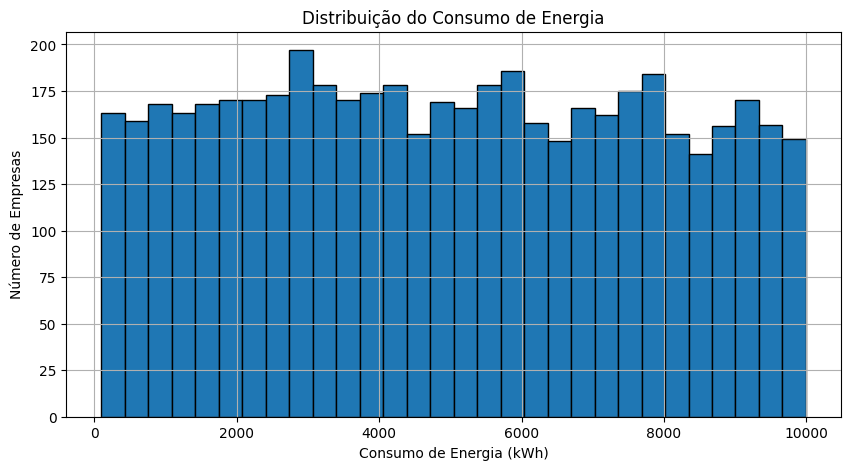

In [ ]:

#3.1 - Energy consumption distribuition graph

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
df['energia_kwh'].hist(bins=30, edgecolor='black')
plt.xlabel('Consumo de Energia (kWh)')
plt.ylabel('Número de Empresas')
plt.title('Distribuição do Consumo de Energia')
plt.show()


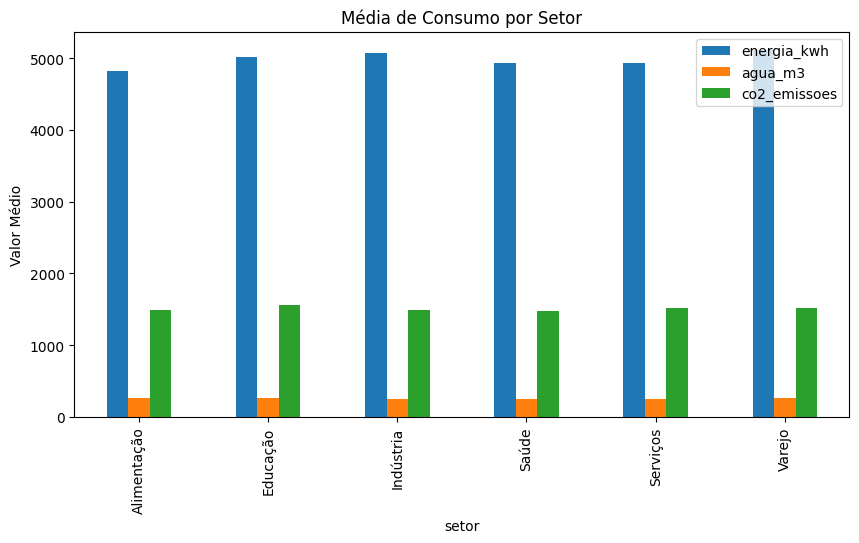

In [ ]:

#3.2 - Comparision between sectors

df.groupby('setor')[['energia_kwh', 'agua_m3', 'co2_emissoes']].mean().plot(kind='bar', figsize=(10,5))
plt.title('Média de Consumo por Setor')
plt.ylabel('Valor Médio')
plt.show()


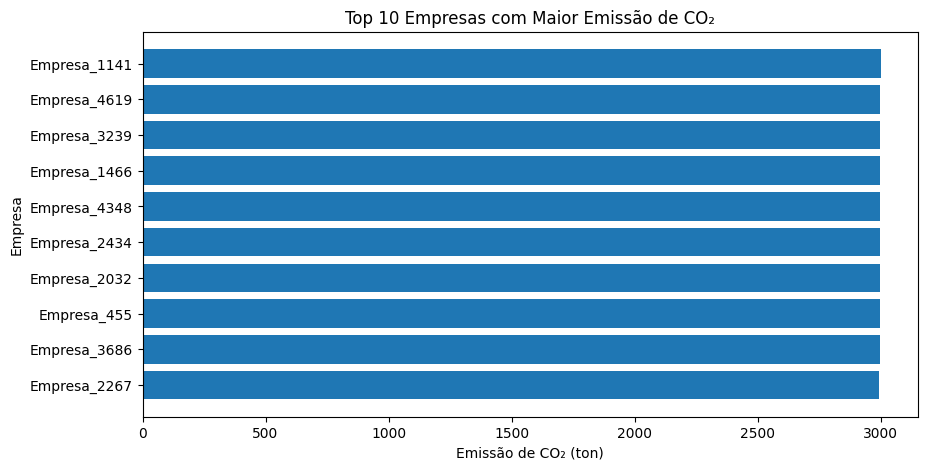

In [ ]:

#3.3 - Largest CO₂ emitors

top_emitentes = df[['empresa', 'co2_emissoes']].sort_values(by='co2_emissoes', ascending=False).head(10)
plt.figure(figsize=(10, 5))
plt.barh(top_emitentes['empresa'], top_emitentes['co2_emissoes'])
plt.xlabel('Emissão de CO₂ (ton)')
plt.ylabel('Empresa')
plt.title('Top 10 Empresas com Maior Emissão de CO₂')
plt.gca().invert_yaxis()
plt.show()

## **4. Outliers**

In [ ]:

Q1 = df['energia_kwh'].quantile(0.25)
Q3 = df['energia_kwh'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = df[(df['energia_kwh'] < limite_inferior) | (df['energia_kwh'] > limite_superior)]
print(outliers)

Empty DataFrame
Columns: [empresa, energia_kwh, agua_m3, co2_emissoes, setor]
Index: []


In [ ]:

limite_superior = Q3 + 3 * IQR
limite_inferior = Q1 - 3 * IQR

outliers = df[(df['energia_kwh'] < limite_inferior) | (df['energia_kwh'] > limite_superior)]
print(outliers)


Empty DataFrame
Columns: [empresa, energia_kwh, agua_m3, co2_emissoes, setor]
Index: []


In [ ]:

media = df['energia_kwh'].mean()
desvio = df['energia_kwh'].std()

limite_superior = media + 2 * desvio
limite_inferior = media - 2 * desvio

outliers = df[(df['energia_kwh'] < limite_inferior) | (df['energia_kwh'] > limite_superior)]
print(outliers)


Empty DataFrame
Columns: [empresa, energia_kwh, agua_m3, co2_emissoes, setor]
Index: []


In [ ]:
!pip install seaborn

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

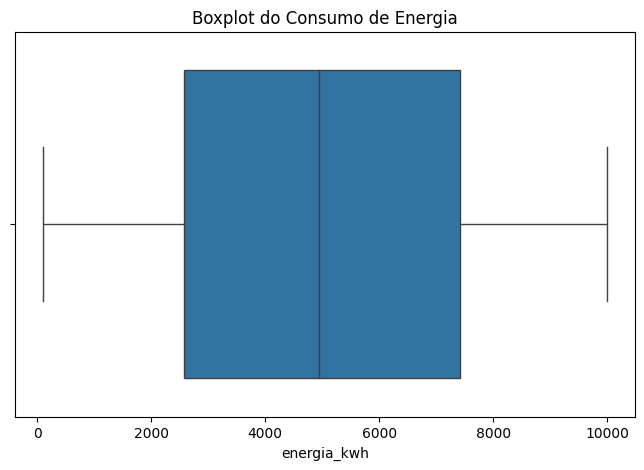

In [ ]:

plt.figure(figsize=(8,5))
sns.boxplot(x=df['energia_kwh'])
plt.title('Boxplot do Consumo de Energia')
plt.show()


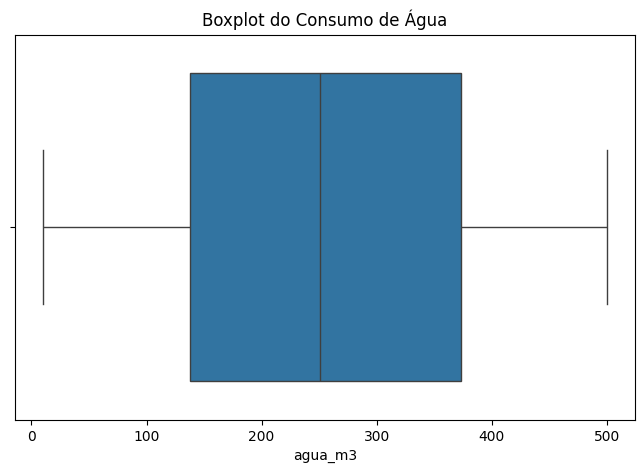

In [ ]:

plt.figure(figsize=(8,5))
sns.boxplot(x=df['agua_m3'])
plt.title('Boxplot do Consumo de Água')
plt.show()


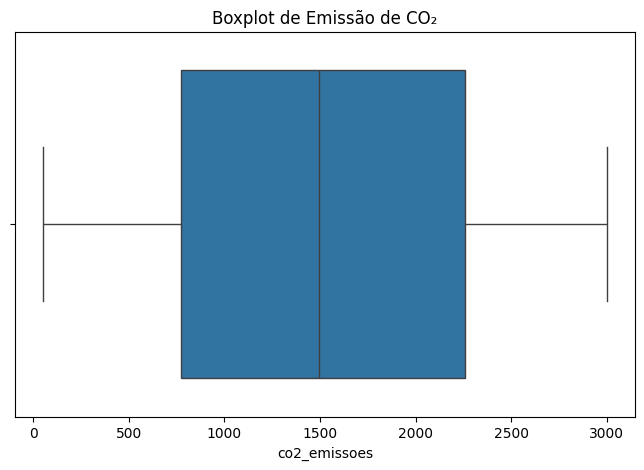

In [ ]:

plt.figure(figsize=(8,5))
sns.boxplot(x=df['co2_emissoes'])
plt.title('Boxplot de Emissão de CO₂')
plt.show()


In [ ]:
#df.to_csv('dados_processados.csv', index=False)

In [ ]:

# Covariância

print(df[['energia_kwh', 'agua_m3', 'co2_emissoes']].cov())


               energia_kwh       agua_m3   co2_emissoes
energia_kwh   7.958500e+06  -7759.953658    2774.388720
agua_m3      -7.759954e+03  19383.744562    2241.007669
co2_emissoes  2.774389e+03   2241.007669  721742.760976


In [ ]:

# Correlação

print(df[['energia_kwh', 'agua_m3', 'co2_emissoes']].corr())


              energia_kwh   agua_m3  co2_emissoes
energia_kwh      1.000000 -0.019757      0.001158
agua_m3         -0.019757  1.000000      0.018947
co2_emissoes     0.001158  0.018947      1.000000


### **Aplicando um Modelo de Distribuição**

In [ ]:
!pip install scipy
!pip install numpy

In [ ]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

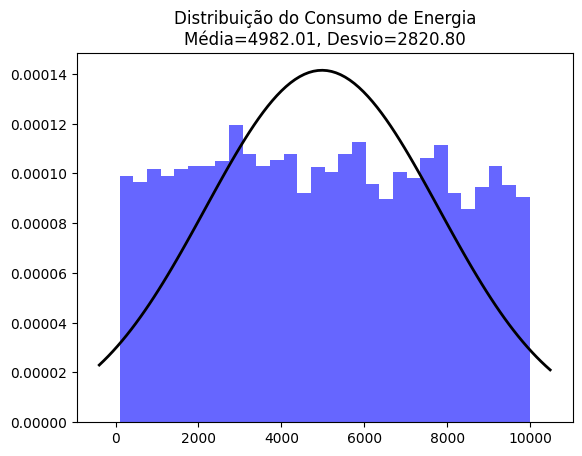

In [ ]:

# Plotando o histograma
plt.hist(df['energia_kwh'], bins=30, density=True, alpha=0.6, color='b')

# Ajuste de uma distribuição normal
mu, std = stats.norm.fit(df['energia_kwh'])  # Média e desvio padrão
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)
plt.title(f'Distribuição do Consumo de Energia\nMédia={mu:.2f}, Desvio={std:.2f}')
plt.show()


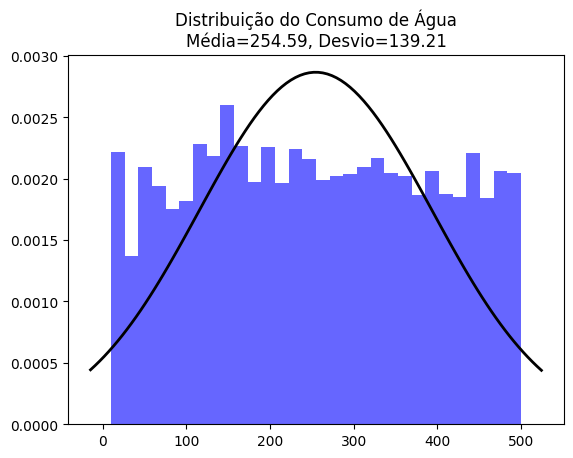

In [ ]:

# Plotando o histograma
plt.hist(df['agua_m3'], bins=30, density=True, alpha=0.6, color='b')

# Ajuste de uma distribuição normal
mu, std = stats.norm.fit(df['agua_m3'])  # Média e desvio padrão
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)
plt.title(f'Distribuição do Consumo de Água\nMédia={mu:.2f}, Desvio={std:.2f}')
plt.show()


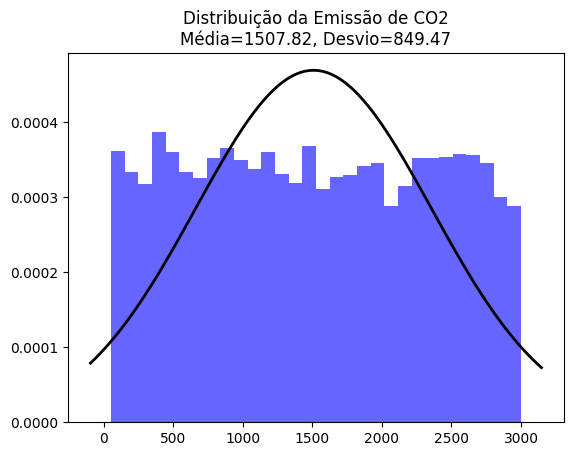

In [ ]:

# Plotando o histograma
plt.hist(df['co2_emissoes'], bins=30, density=True, alpha=0.6, color='b')

# Ajuste de uma distribuição normal
mu, std = stats.norm.fit(df['co2_emissoes'])  # Média e desvio padrão
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)
plt.title(f'Distribuição da Emissão de CO2\nMédia={mu:.2f}, Desvio={std:.2f}')
plt.show()


## **Criação de um Modelo Preditivo**

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Definir variáveis preditoras (X) e variável alvo (y)
X = df[['energia_kwh', 'agua_m3']]
y = df['co2_emissoes']

# Separar em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Fazer previsões
y_pred = modelo.predict(X_test)

# Avaliação do modelo
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae:.2f}')
print(f'R²: {r2:.2f}')


MAE: 736.89
R²: 0.00


In [ ]:
!pip install seaborn

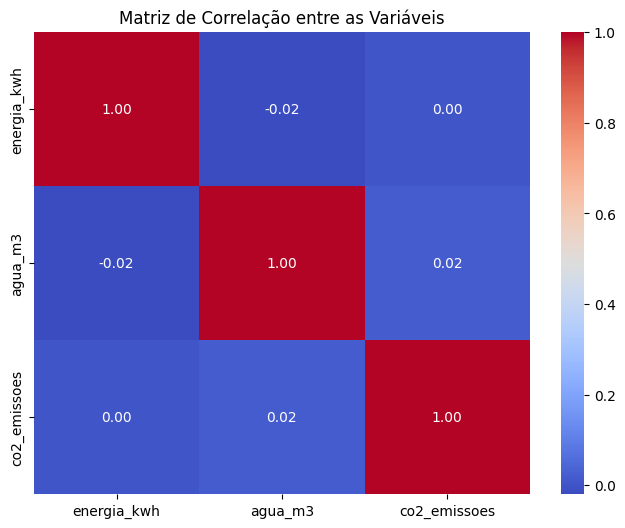

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("dados_sensores_5000.csv")
numeric_df = df.select_dtypes(include=['number'])

# Matriz de correlação
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação entre as Variáveis')
plt.show()


In [ ]:
# Modelo não linear

from sklearn.ensemble import RandomForestRegressor

modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)
y_pred_rf = modelo_rf.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
print(f'R² (Random Forest): {r2_rf:.2f}')


R² (Random Forest): -0.14


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Criar e treinar o modelo Random Forest
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

# Fazer previsões
y_pred_rf = modelo_rf.predict(X_test)

# Avaliação do modelo
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'MAE (Random Forest): {mae_rf:.2f}')
print(f'R² (Random Forest): {r2_rf:.2f}')


MAE (Random Forest): 764.38
R² (Random Forest): -0.14


In [ ]:
import numpy as np

df['co2_emissoes_log'] = np.log1p(df['co2_emissoes'])
y_log = df['co2_emissoes_log']

# Separar em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Repetir a regressão linear com a variável transformada
modelo.fit(X_train, y_train)
y_pred_log = modelo.predict(X_test)

# Avaliação do modelo transformado
mae_log = mean_absolute_error(y_test, y_pred_log)
r2_log = r2_score(y_test, y_pred_log)

print(f'MAE (log transform): {mae_log:.2f}')
print(f'R² (log transform): {r2_log:.2f}')


MAE (log transform): 0.65
R² (log transform): 0.00


## **Métricas de Eficiência e Impacto**


In [ ]:
# Eficiência energética
df['eficiencia_energia'] = df['energia_kwh'] / df['agua_m3']


In [ ]:
# Intensidade de Carbono (CO₂ por kWh)
df['intensidade_carbono'] = df['co2_emissoes'] / df['energia_kwh']


In [ ]:
# Consumo relativo por setor
df_setores = df.groupby('setor')[['energia_kwh', 'agua_m3', 'co2_emissoes']].mean().reset_index()


In [ ]:
# Empresas com Melhor e Pior Eficiência Energética
top_eficientes = df[['empresa', 'eficiencia_energia']].sort_values(by='eficiencia_energia').head(10)
top_ineficientes = df[['empresa', 'eficiencia_energia']].sort_values(by='eficiencia_energia', ascending=False).head(10)


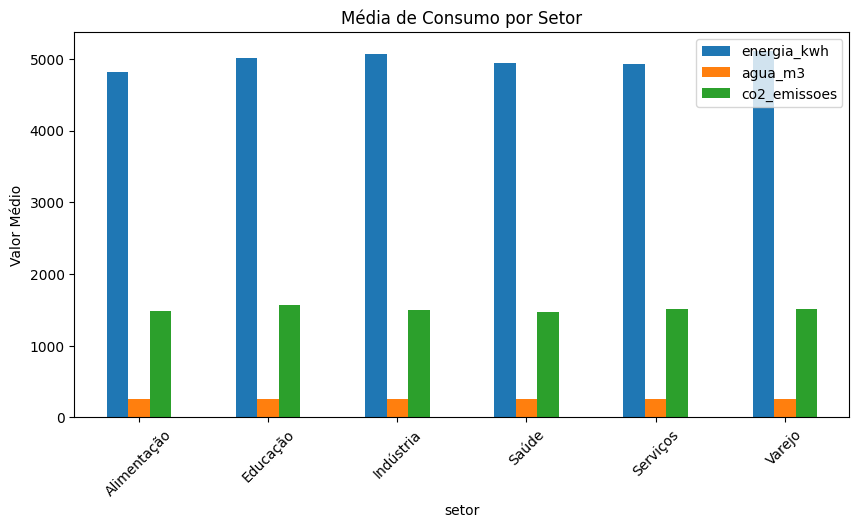

In [ ]:
import matplotlib.pyplot as plt

df_setores.plot(x='setor', kind='bar', figsize=(10,5))
plt.title('Média de Consumo por Setor')
plt.ylabel('Valor Médio')
plt.xticks(rotation=45)
plt.show()


<ipython-input-69-3aa365b73b5c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_eficientes, x='empresa', y='eficiencia_energia', palette='Blues')


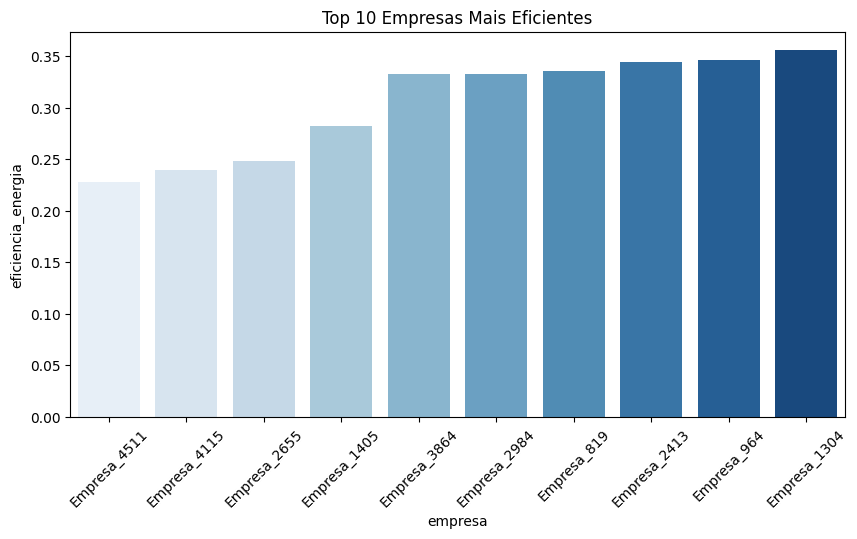

<ipython-input-69-3aa365b73b5c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_ineficientes, x='empresa', y='eficiencia_energia', palette='Reds')


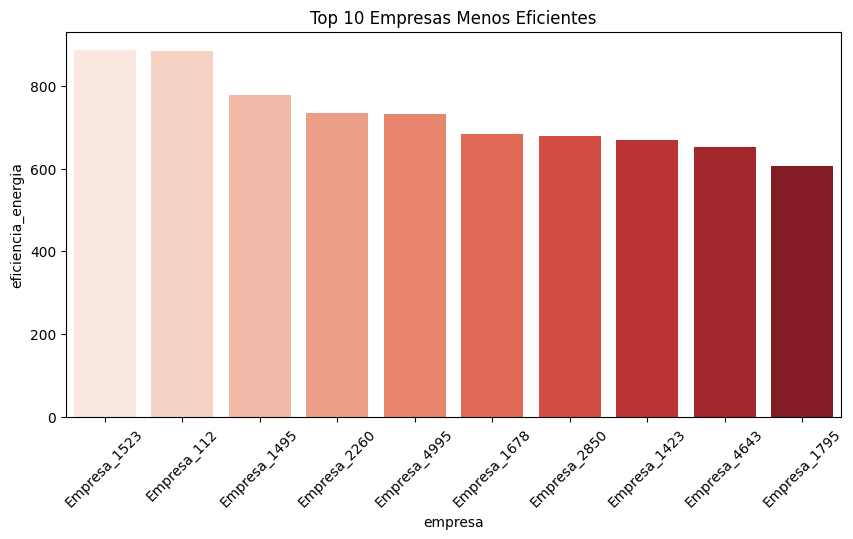

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,5))
sns.barplot(data=top_eficientes, x='empresa', y='eficiencia_energia', palette='Blues')
plt.xticks(rotation=45)
plt.title('Top 10 Empresas Mais Eficientes')
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(data=top_ineficientes, x='empresa', y='eficiencia_energia', palette='Reds')
plt.xticks(rotation=45)
plt.title('Top 10 Empresas Menos Eficientes')
plt.show()
